In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a sample dataset 

In [18]:
data  = {
    "Age" : [22,35, 48],
    "Salary" : [23000,40000,45000]
}
df = pd.DataFrame(data)

In [19]:
df.head()

,Age,Salary
0,22,23000
1,35,40000
2,48,45000


#### data preprocessing

In [20]:
df.shape

(3, 2)

In [21]:
df.columns

Index(['Age', 'Salary'], dtype='object')

In [22]:
df.dtypes

Age       int64
Salary    int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     3 non-null      int64
 1   Salary  3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


In [24]:
df.isnull().sum()

Age       0
Salary    0
dtype: int64

<Axes: >

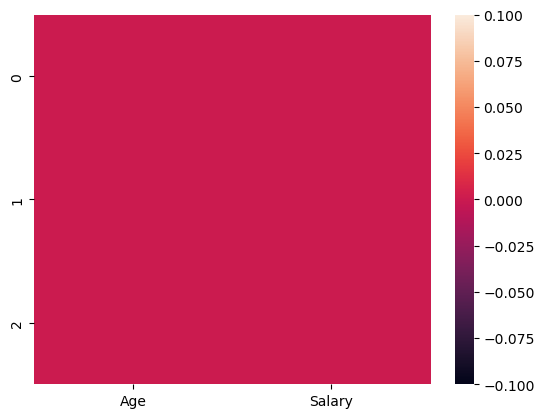

In [25]:
plt.Figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [26]:
df.isnull().sum()/df.shape[0]*100

Age       0.0
Salary    0.0
dtype: float64

### EDA

In [27]:
df.describe()

,Age,Salary
count,3.0,3.000000
mean,35.0,36000.000000
std,13.0,11532.562595
min,22.0,23000.000000
25%,28.5,31500.000000
50%,35.0,40000.000000
75%,41.5,42500.000000
max,48.0,45000.000000


#### Traget varible analysis

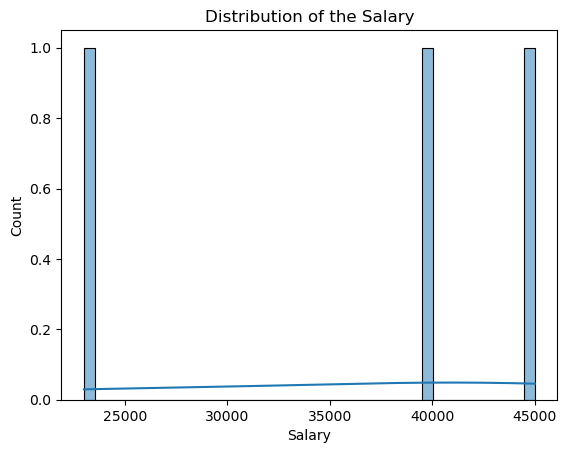

In [30]:

sns.histplot(df["Salary"], bins=40, kde=True)
plt.title("Distribution of the Salary")
plt.show()

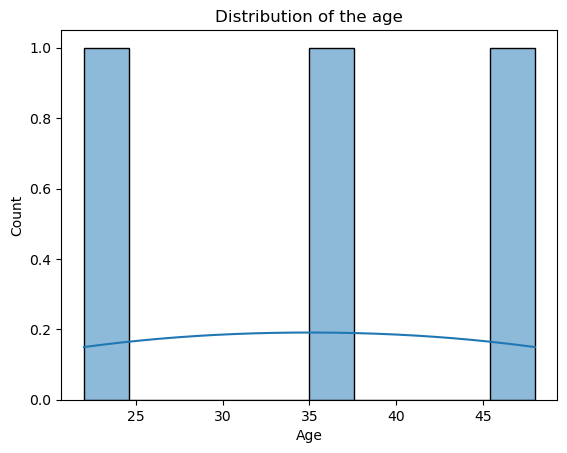

In [31]:
sns.histplot(df["Age"], bins= 10, kde= True)
plt.title("Distribution of the age")
plt.show()

#### Outlier detection 

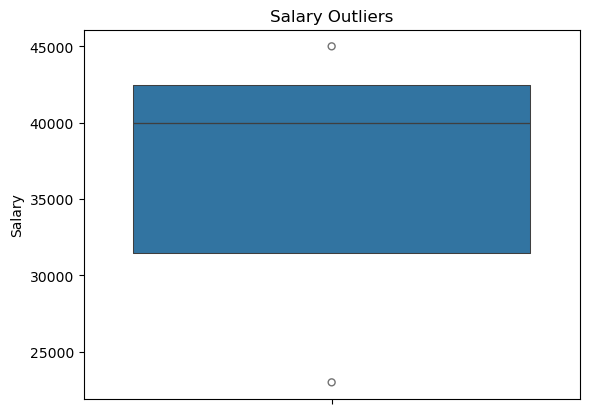

In [32]:
sns.boxenplot(y=df["Salary"])
plt.title("Salary Outliers")
plt.show()

#### Realtion between salary and age

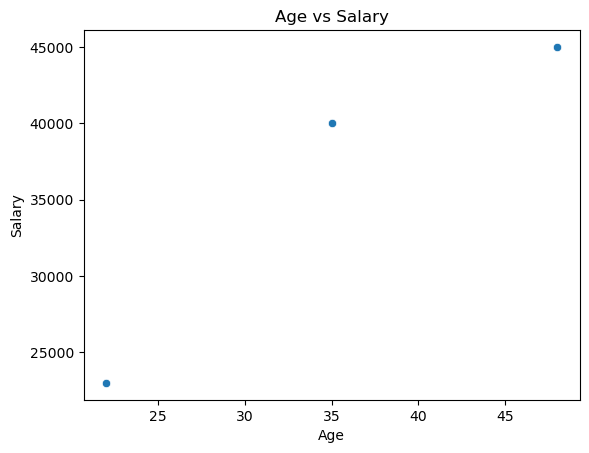

In [33]:
sns.scatterplot(x= "Age" , y= "Salary", data=df)
plt.title("Age vs Salary")
plt.show()

#### Correlation Analysis

In [35]:
df.corr()

,Age,Salary
Age,1.000000,0.953821
Salary,0.953821,1.000000


#### Model Building 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [37]:
x = df[["Age"]]  # Independent varible 
y = df[["Salary"]] # Dependent (Target varible )

In [38]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [41]:
model.predict([[28]])

d:\Program\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30076.92307692]])

<!-- Error Calculation (How Good Is the Model?) -->

#### Error Calculation (How Good Is the Model?)

In [43]:
from sklearn.metrics import  mean_absolute_error

y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
mae

2666.6666666666665

#### Mean Squared Error (MSE)

In [44]:
from sklearn.metrics import mean_squared_error

mse  = mean_squared_error(y, y_pred)

#### R² Score

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)


#### Residuals (Concept Only)

In [46]:
residuals = y-y_pred
residuals

,Salary
0,-2000.0
1,4000.0
2,-2000.0
